In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

# Implementacion de Lasso y Ridge


In [3]:
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Creamos una función que nos permita entrenar al modelo, y evaluar su rendimiento con una métrica parametrizada.


In [4]:
def fit_predict_score(model, X_train, y_train, X_test, y_test, metric):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = metric(y_test, y_pred)
    return score, y_pred

Cargamos nuestro dataset:


In [5]:
dataset = pd.read_csv("../data/felicidad.csv")

dataset.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


Optamos por conservar únicamente un par de features y creamos nuestros conjuntos de entrenamiento y testing:


In [6]:
# Vamos a elegir los features que vamos a usar
X = dataset[
    ["gdp", "family", "lifexp", "freedom", "corruption", "generosity", "dystopia"]
]

# Defibimos nuestro objetivo, que sera nuestro datase, pero solo en la columna score
y = dataset[["score"]]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

(155, 7)
(155, 1)


Creamos los modelos que vamos a comparar y los asociamos a un diccionario cuya llave es el nombre del modelo y valor es la instancia del modelo.


In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.2),
    "Ridge": Ridge(alpha=1),
    "ElasticNet": ElasticNet(alpha=0.1),
}

Finalmente, para cada modelo, llamamos a nuestra función `fit_predict_score`


In [8]:
results = {}
predictions = {}
for name, model in models.items():
    score, y_pred = fit_predict_score(model, X_train, y_train, X_test, y_test, mse)
    results[name] = score
    predictions[name] = y_pred
    print(f"{name} loss: {score}")

Linear Regression loss: 9.893337283086119e-08
Lasso loss: 0.46345076714372424
Ridge loss: 0.00565012449996281
ElasticNet loss: 0.19278244368399594


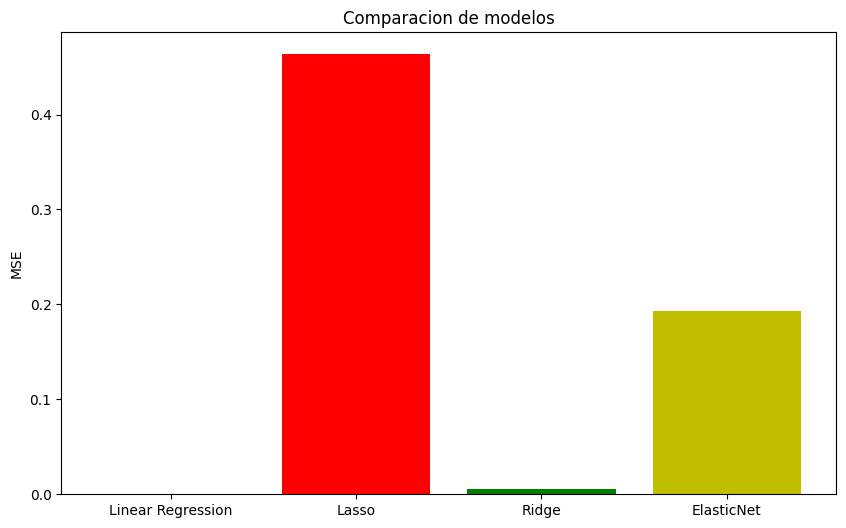

In [9]:
# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=["b", "r", "g", "y"])
plt.ylabel("MSE")
plt.title("Comparacion de modelos")
plt.show()

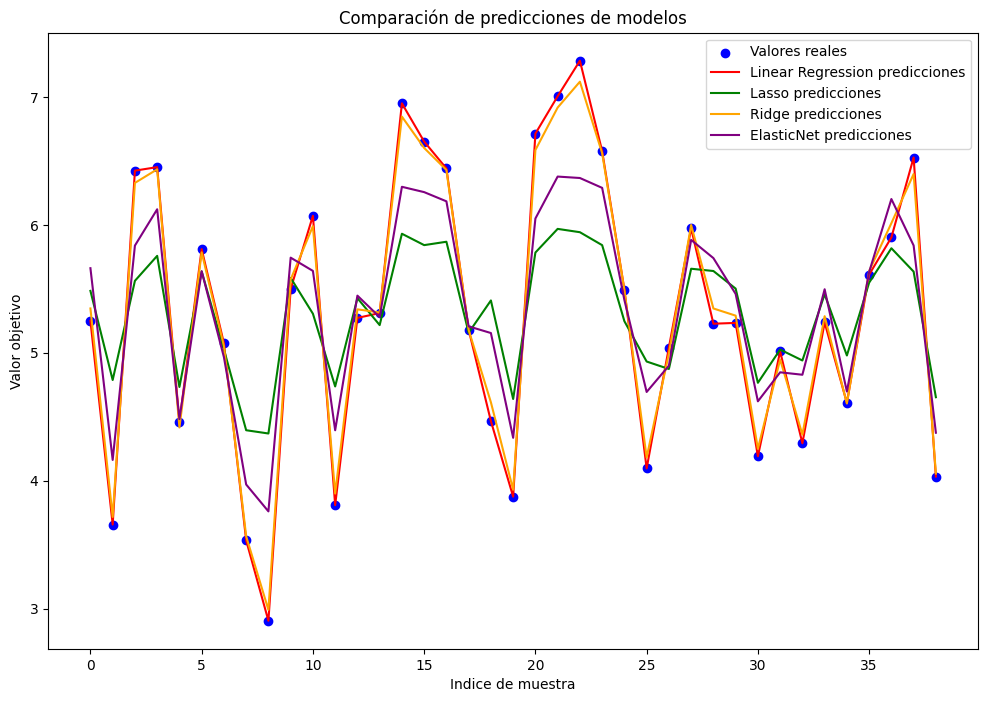

In [10]:
plt.figure(figsize=(12, 8))

plt.scatter(range(len(y_test)), y_test, label="Valores reales", color="blue")

# Predicciones de los modelos
colors = ["red", "green", "orange", "purple"]
for i, (name, prediction) in enumerate(predictions.items()):
    plt.plot(
        range(len(prediction)),
        prediction,
        label=f"{name} predicciones",
        color=colors[i],
    )
plt.title("Comparación de predicciones de modelos")
plt.xlabel("Indice de muestra")
plt.ylabel("Valor objetivo")
plt.legend()
plt.show()

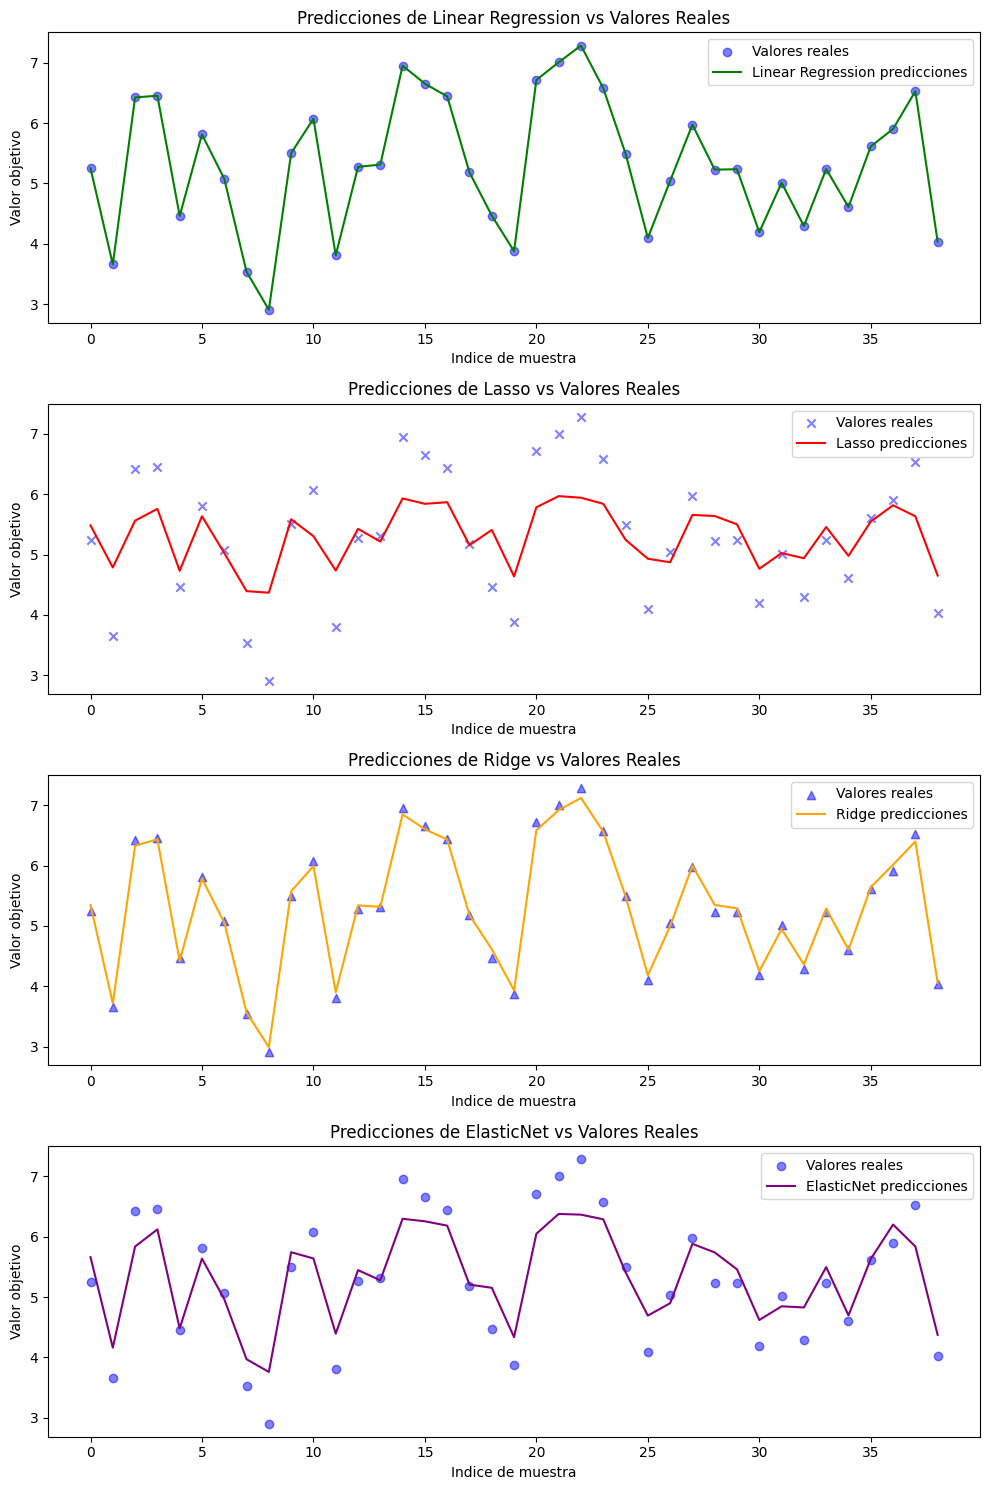

In [13]:
# Graficamos las predicciones de cada modelo contra los valores reales de y_test
fig, axs = plt.subplots(4, 1, figsize=(10, 15))


# Predicciones de los modelos
colors = ["green", "red", "orange", "purple"]
markers = ["o", "x", "^", "o"]
for i, (name, y_pred) in enumerate(
    predictions.items(), start=0
):  # Comienza en 1 para el subplot 1
    # Valores reales de y_test
    axs[i].scatter(
        range(len(y_test)),
        y_test,
        label="Valores reales",
        color="blue",
        marker=markers[i],
        alpha=0.5,
    )
    axs[i].plot(
        range(len(y_test)), y_pred, label=f"{name} predicciones", color=colors[i]
    )
    axs[i].set_title(f"Predicciones de {name} vs Valores Reales")
    axs[i].set_ylabel("Valor objetivo")
    axs[i].set_xlabel("Indice de muestra")
    axs[i].legend()  # Agrega la leyenda al subplot correspondiente

plt.tight_layout()
plt.show()

Como todos nuestros modelos son regresiones lineales, podemos observar los coeficientes que utilizaron en sus regresiones lineales.


In [14]:
for name, model in models.items():
    print(f"Coef {name}: {model.coef_}\n")

Coef Linear Regression: [[1.00012843 0.99994621 0.99983515 1.00003428 0.99977126 1.00025981
  0.99993814]]

Coef Lasso: [1.04336835 0.         0.         0.         0.         0.
 0.3165654 ]

Coef Ridge: [[1.07234856 0.97048582 0.85605399 0.87400159 0.68583271 0.73285696
  0.96206567]]

Coef ElasticNet: [1.10937366 0.67378543 0.29716532 0.         0.         0.
 0.68881632]



## Explicación de resultados

Los coeficientes obtenidos en las regresiones lineales son un arreglo que tiene el mismo tamaño que las columnas que utilizamos, nuestros features.

```python
X = dataset[['gdp', 'family', 'lifexp', 'freedom', 'corruption', 'generosity', 'dystopia']]
```

Los numeros mas grandes dentro del arreglo, significa que la columna en si esta teniendo mas peso en el modelo que estamos entrenando.

### Lasso

- Los valores que Lasso haya hecho 0, nos indica que el algoritmo no te dio la atencion necesaria o no los considero importante. Analizar porque hizo eso nuestro algoritmo Lasso ya esta tarea nuestra como Data Scientist.

### Ridge

- En Ridge ninguno de los coeficientes han sido 0, sino que fueron disminuidos, esto se hace precisamente la regresión Ridge

Menor perdida es mejor, esto quiere decir que hubo menos equivocacion entre los valores esperados y los valores predichos.

Esto quiere decir que en este preciso ejemplo quien obtuvo mejores resultados fue `Linear Regression Loss`


## ElasticNet: Una técnica Intermedia
